In [0]:
import pandas as pd
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
from os import listdir
import cv2 

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/question_1_dataset/Train.csv') # read the training data file from working directory
imagePath = '/content/drive/My Drive/question_1_dataset/train/train/'

In [8]:
df

,name,category
0,1.png,9
1,2.png,3
2,3.png,9
3,4.png,8
4,5.png,13
...,...,...
4460,4461.png,8
4461,4462.png,13
4462,4463.png,6
4463,4464.png,14


In [0]:
images=[]

In [0]:
for i in range(len(df)):
    #print(df.loc[i]['name'])
    images.append(cv2.imread(f'/content/drive/My Drive/question_1_dataset/train/train/{df.loc[i]["name"]}'))

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, df['category'], test_size=0.20, random_state=42)

In [52]:
x,y = np.asarray(X_train), np.asarray(y_train)
x.shape

(3572, 200, 200, 3)

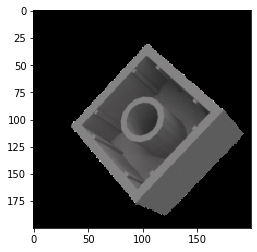

In [14]:
import matplotlib.pyplot as plt
plt.imshow(x[0])

In [0]:
from keras.utils import to_categorical

In [16]:
df['category'].unique()

array([ 9,  3,  8, 13,  7,  2, 16,  6,  1, 14, 15, 12, 10, 11,  5,  4])

In [0]:
Y_train = pd.get_dummies(y_train)
Y_test = pd.get_dummies(y_test)

In [0]:
batch_size = 3572
epochs = 10
IMG_HEIGHT = 200
IMG_WIDTH = 200

In [0]:
from keras.layers import Dense,Conv2D
from keras.preprocessing.image import ImageDataGenerator,img_to_array, load_img
import math

In [0]:
from keras import backend as K
from keras.utils.np_utils import to_categorical
from keras import layers
from keras.preprocessing.image import save_img
from keras.utils.vis_utils import model_to_dot
from keras.applications.vgg16 import VGG16,preprocess_input
from keras.applications.xception import Xception
from keras.applications.nasnet import NASNetMobile
from keras.models import Sequential,Input,Model
import keras.models
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
from keras.layers import SeparableConv2D,BatchNormalization,MaxPooling2D,Conv2D
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam,SGD
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint,EarlyStopping,TensorBoard,CSVLogger,ReduceLROnPlateau,LearningRateScheduler
import tensorflow as tf
from tqdm import tqdm
from tensorflow.keras import datasets, layers, models

In [29]:
train_image = []
for i in tqdm(range(df.shape[0])):
    img = image.load_img('/content/drive/My Drive/question_1_dataset/train/train/'+ df['name'][i], target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 4465/4465 [00:09<00:00, 456.88it/s]


In [0]:
y=df['category'].values
y = to_categorical(y)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [52]:
print(len(y_train))
y_train=pd.get_dummies(y_train)
print(y_train)

3572
      1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
2215   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3515   0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
1406   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3155   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
3101   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
4426   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
466    0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3092   0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0
3772   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
860    0   0   0   0   1   0   0   0   0   0   0   0   0   0   0   0

[3572 rows x 16 columns]


In [0]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(200,200,3)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='softmax'))

In [0]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [0]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Train on 3572 samples, validate on 893 samples
Epoch 1/100
3572/3572 [==============================] - 10s 3ms/step - loss: 0.0198 - acc: 0.9930 - val_loss: 0.9876 - val_acc: 0.8231
Epoch 2/100
3572/3572 [==============================] - 9s 3ms/step - loss: 0.0180 - acc: 0.9944 - val_loss: 0.9123 - val_acc: 0.8197
Epoch 3/100
2624/3572 [=====================>........] - ETA: 2s - loss: 0.0152 - acc: 0.9939

In [0]:
test_df = pd.read_csv('/content/drive/My Drive/question_1_dataset/Test.csv')

In [57]:
test_image = []
for i in tqdm(range(test_df.shape[0])):
    img = image.load_img('/content/drive/My Drive/question_1_dataset/test/test/'+ test_df['name'][i], target_size=(200,200,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
test = np.array(test_image)

100%|██████████| 1914/1914 [00:03<00:00, 530.78it/s]


In [0]:
prediction = model.predict_classes(test)

In [59]:
print(len(prediction))

1914


In [0]:
test_df['category']=prediction

In [0]:
test_df['category'] = test_df['category']+1
test_df.to_csv('Task1_Predicted_Result.csv')

In [102]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit([X_train],Y_train, epochs=10)

Train on 3572 samples
Epoch 1/10


InvalidArgumentError: ignored

In [0]:
model = FCN()

In [0]:
opt = SGD(lr=1e-4,momentum=0.99)
opt1 = Adam(lr=2e-4)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

In [57]:
model.fit([X_train],Y_train, epochs=10)

Epoch 1/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0712 - acc: 0.9727
Epoch 2/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0621 - acc: 0.9756
Epoch 3/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0551 - acc: 0.9791
Epoch 4/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0506 - acc: 0.9802
Epoch 5/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0445 - acc: 0.9828
Epoch 6/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0401 - acc: 0.9841
Epoch 7/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0395 - acc: 0.9845
Epoch 8/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0362 - acc: 0.9860
Epoch 9/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0316 - acc: 0.9877
Epoch 10/10
3572/3572 [==============================] - 30s 8ms/step - loss: 0.0307 - acc: 0.9881


In [0]:
prediction_X = model.predict([X_test])

In [0]:
results_X = []
for i in range(len(prediction_X)):
  results_X.append(np.argmax(prediction_X[i]))


In [60]:
print(results_X),print(list(y_test))

[1, 4, 7, 15, 3, 6, 2, 6, 9, 14, 15, 2, 0, 3, 11, 12, 2, 4, 7, 1, 10, 9, 9, 7, 11, 3, 1, 11, 14, 2, 5, 1, 9, 14, 10, 0, 0, 12, 14, 4, 4, 10, 15, 9, 13, 2, 10, 12, 9, 1, 6, 11, 12, 11, 6, 4, 0, 2, 6, 14, 2, 7, 15, 13, 0, 8, 6, 4, 8, 0, 2, 11, 14, 9, 7, 15, 11, 8, 13, 7, 0, 8, 4, 2, 3, 13, 11, 6, 3, 12, 9, 6, 13, 11, 12, 4, 11, 5, 11, 14, 13, 1, 6, 3, 5, 4, 11, 15, 5, 12, 12, 3, 13, 11, 13, 10, 5, 6, 0, 12, 14, 13, 6, 4, 10, 6, 3, 0, 1, 11, 13, 9, 8, 9, 2, 9, 4, 4, 8, 2, 10, 4, 15, 6, 3, 0, 4, 11, 7, 15, 12, 12, 9, 5, 4, 10, 2, 15, 7, 2, 9, 15, 9, 2, 14, 10, 4, 7, 11, 11, 9, 4, 13, 11, 10, 13, 0, 11, 6, 2, 12, 12, 10, 0, 15, 11, 0, 3, 1, 7, 14, 13, 14, 14, 15, 2, 14, 4, 0, 0, 6, 2, 1, 7, 10, 12, 2, 13, 5, 10, 14, 7, 5, 7, 3, 13, 6, 4, 9, 10, 0, 11, 9, 6, 3, 2, 14, 5, 2, 4, 4, 2, 0, 8, 8, 12, 14, 15, 10, 6, 10, 14, 2, 3, 0, 9, 7, 6, 9, 10, 10, 1, 15, 10, 2, 13, 11, 0, 6, 3, 7, 15, 4, 7, 15, 4, 15, 10, 0, 4, 9, 6, 0, 12, 12, 6, 13, 2, 2, 1, 1, 1, 9, 5, 15, 9, 0, 5, 6, 8, 14, 15, 13, 0, 9, 

(None, None)

In [61]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
con_mat = confusion_matrix(y_test,results_X) 
  
print('Confusion Matrix :')
print(con_mat) 
print('Accuracy Score :',accuracy_score(y_test,results_X) )
print('Report : ')
print(classification_report(y_test,results_X))

Confusion Matrix :
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [54  1  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 61  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  0 56  2  0  1  0  0  0  1  0  0  1  0  0]
 [ 0  0  0  0  1 21  0  0  2  0  0 24  0  1  0  0  0]
 [ 0  0  0  0  0  0 60  0  0  1  0  0  0  1  0  0  0]
 [ 0  0  0  5  1  0  0 46  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5  0  1 27  1  0  3  0  1  0  0  0]
 [ 0  0  0  0  0  0  2  0  0 60  1  1  0  0  0  2  0]
 [ 0  0  0  0  0  0  0  0  0  0 57  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  0  0  1  1  0 50  0  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 50  2  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  0 43  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  5 43  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 47  0]]
Accuracy Score : 0.015677491601343786
Report : 
              

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [0]:
test_df = pd.read_csv('/content/drive/My Drive/question_1_dataset/Test.csv')

In [31]:
test_images=[]
for i in range(len(df)):
    #print(test_df.loc[i]['name'])
    test_images.append(cv2.imread(f'/content/drive/My Drive/question_1_dataset/test/test/{test_df.loc[i]["name"]}'))

KeyError: ignored

In [0]:
predictions = model.predict([X_test])

In [0]:
results_test = []
for i in range(len(predictions)):
  results_test.append(np.argmax(predictions[i]))

In [0]:
test_df['category']=results_test

In [0]:
test_df.head()

In [0]:
test_df.to_csv('results.csv')

In [0]:
test_df['category'].head()

In [0]:
test_df['category']+1

In [0]:
test_df.head()

In [0]:
test_df['category'] = test_df['category']+1
test_df.to_csv('Task1_Result.csv')